## 6.5 Machine Learning - Clustering

### This script contains the following:

#### 1. Import libraries and data
#### 2. Data prep
#### 3. The elbow technique
#### 4. K-means clustering
    4.1 Visualizations
    4.2 Descriptive statistics and insights
#### 5. Export data

#### 1. Import libraries and data

In [51]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pylab as pl

In [52]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [53]:
#Import Data

# Define the path to your directory and file name
path = r'C:\Users\north\10-2024 Exploring Chocolate Bar Quality\02 Data\Prepared Data'
file_name = 'cleaned_cacao_data_mapped_clustered_decimal.xlsx'

# Read the Excel file
df_cacao = pd.read_excel(os.path.join(path, file_name))

#### 2. Data prep

In [55]:
df_cacao.head()

,Index,Company,Bean Origin,Reference,Review Date,Cocoa Percent,Company Location,Latitude,Longitude,Company Loc_Latitude,Company Loc_Longitude,Rating,Bean Type,Broad Bean Origin,Region_Final,Cluster,Latitude2,Longitude3,Broad Bean_Latitude,Broad Bean_Longitude
0,440,Compania de Chocolate (Salgado),Moxos,292,2008,0.72,Argentina,S 34° 0′ 0'',W 64° 0′ 0'',-34.0,-64.0,3.25,Unknown,Bolivia,Bolivia,Yellow,S 17° 0′ 0'',W 65° 0′ 0'',-17.00,-65.00
1,1414,Salgado,Bahia Superior,288,2008,0.70,Argentina,S 34° 0′ 0'',W 64° 0′ 0'',-34.0,-64.0,3.50,Forastero,Brazil,Brazil,Yellow,S 10° 0′ 0'',W 55° 0′ 0'',-10.00,-55.00
2,442,Compania de Chocolate (Salgado),Esmeraldas,296,2008,0.88,Argentina,S 34° 0′ 0'',W 64° 0′ 0'',-34.0,-64.0,2.75,Forastero (Nacional),Ecuador,Ecuador,Yellow,S 1° 15′ 0'',W 78° 15′ 0'',-1.25,-78.25
3,1415,Salgado,Esmeraldas,288,2008,0.70,Argentina,S 34° 0′ 0'',W 64° 0′ 0'',-34.0,-64.0,3.50,Forastero (Nacional),Ecuador,Ecuador,Yellow,S 1° 15′ 0'',W 78° 15′ 0'',-1.25,-78.25
4,1417,Salgado,Rio Arriba,292,2008,0.70,Argentina,S 34° 0′ 0'',W 64° 0′ 0'',-34.0,-64.0,3.50,Forastero (Arriba) ASSS,Ecuador,Ecuador,Yellow,S 1° 15′ 0'',W 78° 15′ 0'',-1.25,-78.25


In [56]:
#Select and prepare numerical data
numerical_columns = ['Review Date', 'Cocoa Percent', 'Rating']
data_numerical = df_cacao[numerical_columns]

In [57]:
data_numerical

,Review Date,Cocoa Percent,Rating
0,2008,0.72,3.25
1,2008,0.70,3.50
2,2008,0.88,2.75
3,2008,0.70,3.50
4,2008,0.70,3.50
...,...,...,...
1786,2012,0.72,3.50
1787,2012,0.70,3.50
1788,2012,0.78,3.50
1789,2012,0.80,3.00


**Note:** Reference column is excluded as it works  just an identifier (ID) and doesn't carry any meaningful numerical value for clustering.

In [59]:
#Standardize the numerical data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numerical)

In [60]:
data_scaled

array([[-1.47822554,  0.04985324,  0.13280689],
       [-1.47822554, -0.26704882,  0.6567213 ],
       [-1.47822554,  2.58506974, -0.91502192],
       ...,
       [-0.11124377,  1.00055943,  0.6567213 ],
       [-0.11124377,  1.31746149, -0.39110752],
       [-0.11124377,  0.3667553 ,  0.6567213 ]])

In [61]:
# Convert the standardized data back to a DataFrame for easier manipulation
data_scaled_df = pd.DataFrame(data_scaled, columns=numerical_columns)

#### 3. The elbow technique

In [63]:
# Use Elbow Method to determine optimal k
inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled_df)
    inertia.append(kmeans.inertia_)

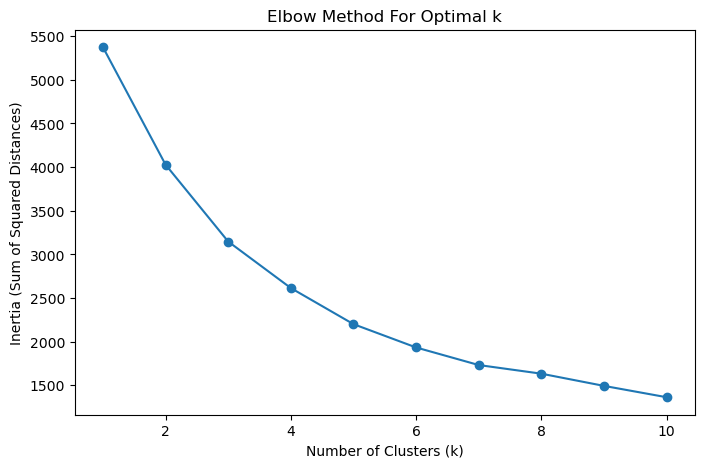

In [64]:
# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.show()

The curve begins to flatten around 3 clusters. After 3, the reduction in inertia becomes less significant, indicating that adding more clusters would not significantly improve the model’s fit. The ideal number of clusters for this dataset is 3.

#### 4. K-means clustering

In [67]:
# Apply K-Means clustering with k=3
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(data_scaled_df)

In [68]:
# Add the cluster labels to the original dataset
df_cacao['Cluster'] = clusters

In [69]:
df_cacao.head()

,Index,Company,Bean Origin,Reference,Review Date,Cocoa Percent,Company Location,Latitude,Longitude,Company Loc_Latitude,Company Loc_Longitude,Rating,Bean Type,Broad Bean Origin,Region_Final,Cluster,Latitude2,Longitude3,Broad Bean_Latitude,Broad Bean_Longitude
0,440,Compania de Chocolate (Salgado),Moxos,292,2008,0.72,Argentina,S 34° 0′ 0'',W 64° 0′ 0'',-34.0,-64.0,3.25,Unknown,Bolivia,Bolivia,0,S 17° 0′ 0'',W 65° 0′ 0'',-17.00,-65.00
1,1414,Salgado,Bahia Superior,288,2008,0.70,Argentina,S 34° 0′ 0'',W 64° 0′ 0'',-34.0,-64.0,3.50,Forastero,Brazil,Brazil,0,S 10° 0′ 0'',W 55° 0′ 0'',-10.00,-55.00
2,442,Compania de Chocolate (Salgado),Esmeraldas,296,2008,0.88,Argentina,S 34° 0′ 0'',W 64° 0′ 0'',-34.0,-64.0,2.75,Forastero (Nacional),Ecuador,Ecuador,2,S 1° 15′ 0'',W 78° 15′ 0'',-1.25,-78.25
3,1415,Salgado,Esmeraldas,288,2008,0.70,Argentina,S 34° 0′ 0'',W 64° 0′ 0'',-34.0,-64.0,3.50,Forastero (Nacional),Ecuador,Ecuador,0,S 1° 15′ 0'',W 78° 15′ 0'',-1.25,-78.25
4,1417,Salgado,Rio Arriba,292,2008,0.70,Argentina,S 34° 0′ 0'',W 64° 0′ 0'',-34.0,-64.0,3.50,Forastero (Arriba) ASSS,Ecuador,Ecuador,0,S 1° 15′ 0'',W 78° 15′ 0'',-1.25,-78.25


In [70]:
df_cacao['Cluster'].value_counts()

Cluster
1    911
0    523
2    357
Name: count, dtype: int64

##### 4.1 Visualizations

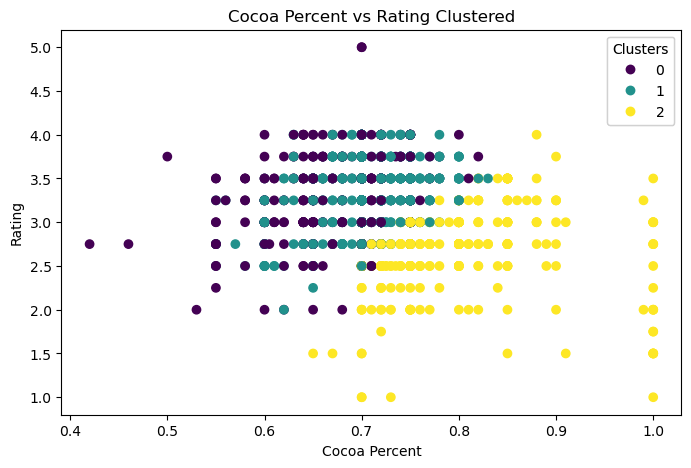

In [72]:
# Visualize the clusters with scatterplots and include a legend for clusters
plt.figure(figsize=(8, 5))
scatter = plt.scatter(df_cacao['Cocoa Percent'], df_cacao['Rating'], c=clusters, cmap='viridis')

# Add title and labels
plt.title('Cocoa Percent vs Rating Clustered')
plt.xlabel('Cocoa Percent')
plt.ylabel('Rating')

# Create a legend with cluster numbers
legend1 = plt.legend(*scatter.legend_elements(), title="Clusters", loc="upper right")
plt.gca().add_artist(legend1)

plt.show()

**Cocoa Percent vs Rating Clustered**

- Cluster 0 (Purple): Chocolates with cocoa content primarily between 50% and 75% fall in this cluster, receiving moderate ratings around 3 to 3.5. This dense grouping suggests that chocolates in this cocoa range commonly achieve average ratings, with little variation due to cocoa content.

- Cluster 1 (Green): This cluster represents higher cocoa content, mostly above 80%, with ratings centered around the mid-range (around 3). These chocolates with high cocoa content are less common and tend to receive average ratings, showing no clear trend toward higher or lower scores.

- Cluster 2 (Yellow): Similar in cocoa percentage to Cluster 0, but with slightly lower ratings (around 2.5 to 3). This indicates that some chocolates with moderate cocoa content may receive lower ratings, possibly influenced by factors beyond cocoa content.

**Overall Insight:** The clustering suggests a weak relationship between cocoa content and rating, as ratings do not consistently change with cocoa percentages. This supports the hypothesis that cocoa content alone does not significantly impact chocolate ratings.

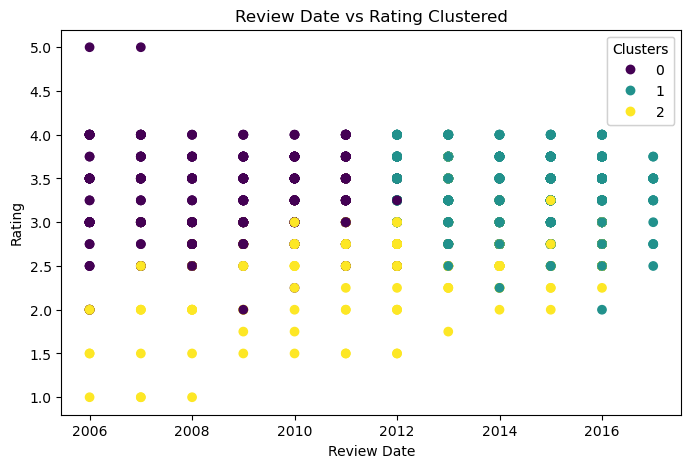

In [74]:
# Visualize clusters using the original Review Date (non-standardized) and Rating
plt.figure(figsize=(8, 5))
scatter = plt.scatter(df_cacao['Review Date'], df_cacao['Rating'], c=df_cacao['Cluster'], cmap='viridis')

# Add title and labels
plt.title('Review Date vs Rating Clustered')
plt.xlabel('Review Date')
plt.ylabel('Rating')

# Create a legend with cluster numbers
legend1 = plt.legend(*scatter.legend_elements(), title="Clusters", loc="upper right")
plt.gca().add_artist(legend1)

plt.show()


**Review Date vs Rating Clustered**

- There’s a clear pattern over time. The older reviews (from 2006–2010) tend to fall into one cluster (yellow), while more recent reviews (2012–2016) mostly fall into another (purple), with some overlap in the middle.
  
- This suggests that product ratings have changed over time. Newer reviews seem to be in a different cluster than older ones, which could reflect changing consumer preferences, evolving product quality, or market trends.

- It looks like the clusters reflect a time-based trend, showing that reviews from different periods tend to group together. This could be useful for understanding how product perceptions have shifted over time. time.


In [76]:
# Rename clusters to more descriptive labels (optional)
df_cacao.loc[df_cacao['Cluster'] == 2, 'Cluster'] = 'Yellow'
df_cacao.loc[df_cacao['Cluster'] == 1, 'Cluster'] = 'Green'
df_cacao.loc[df_cacao['Cluster'] == 0, 'Cluster'] = 'Purple'

# Calculate descriptive statistics for each cluster
cluster_stats = df_cacao.groupby('Cluster').agg({
    'Review Date': ['mean', 'median'], 
    'Cocoa Percent': ['mean', 'median'], 
    'Rating': ['mean', 'median']
})


C:\Users\north\AppData\Local\Temp\ipykernel_22216\2963623173.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Yellow' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  df_cacao.loc[df_cacao['Cluster'] == 2, 'Cluster'] = 'Yellow'


In [77]:
cluster_stats

Review Date         Cocoa Percent           Rating       
                mean  median          mean median      mean median
Cluster                                                           
Green    2014.363337  2015.0      0.704885   0.70  3.321899   3.25
Purple   2009.022945  2009.0      0.688681   0.70  3.300191   3.25
Yellow   2011.963585  2012.0      0.788669   0.77  2.675070   2.75

### 4.2 Descriptive Statistics and Insights

#### **Green Cluster**:
- **Review Date**: This cluster contains the most recently reviewed products, with an average review year of **2014.4** and a median of **2015**. This suggests that the chocolates in this cluster are relatively new compared to others.
- **Cocoa Percent**: The average cocoa content in this cluster is **70.5%**, with a median of **70%**, indicating that these are high-cocoa products, likely appreciated by those with a preference for darker chocolates.
- **Rating**: The average rating for this cluster is **3.32**, with a median rating of **3.25**, suggesting that these newer, high-cocoa products are moderately well-received.

> **Insight**: The **green cluster** represents more recent, high-cocoa chocolates that receive average ratings, possibly appealing to consumers who appreciate the complexity of higher cocoa content.

---

#### **Purple Cluster**:
- **Review Date**: The products in this cluster have an average review year of **2009.0** and a median of **2009**, making them older than those in the green cluster.
- **Cocoa Percent**: The average cocoa content for this cluster is **68.9%**, with a median of **70%**, slightly lower than the green cluster but still high enough to appeal to dark chocolate enthusiasts.
- **Rating**: The average rating is **3.30**, with a median rating of **3.25**, similar to the green cluster, indicating moderate consumer reception.

> **Insight**: The **purple cluster** includes moderately rated products with high cocoa content, which tend to be older than the green cluster. These chocolates might appeal to traditional dark chocolate fans, maintaining a stable consumer interest over time.

---

#### **Yellow Cluster**:
- **Review Date**: The average review year for this cluster is **2012.0** with a median of **2012**, indicating that these chocolates have been on the market longer than the green cluster but are more recent than those in the purple cluster.
- **Cocoa Percent**: The average cocoa percentage is **78.9%**, with a median of **77%**, making this cluster the highest in cocoa content, likely representing the darkest chocolates in the dataset.
- **Rating**: This cluster has the lowest average rating of **2.68**, with a median rating of **2.75**, suggesting that these high-cocoa chocolates are less favorably received, potentially due to their intense flavor profile.

> **Insight**: The **yellow cluster** represents older, very high-cocoa chocolates that tend to have lower ratings, possibly due to their intense taste, which might not appeal to a broad audience.

---

### Overall Insights:
- The **green cluster** comprises newer, high-cocoa products with average ratings, indicating moderate consumer acceptance of these darker chocolates.
- The **purple cluster** contains older, moderately high-cocoa products with stable, average ratings, possibly appealing to traditional dark chocolate fans.
- The **yellow cluster** includes the highest cocoa content chocolates, which receive the lowest ratings, potentially reflecting the niche appeal of very dark chocolates.

These clusters provide insights into how review date, cocoa content, and ratings interact, suggesting that newer products with moderate to high cocoa content are better received than the oldest and most intense ones. Further exploration of additional factors, such as **brand reputation**, **bean origin**, and **region**, could help identify other influences on consumer ratings.


#### Possible future steps:

- Green Cluster (High Cocoa, Lower Ratings): Focus on how Cocoa Percent and Region influence the lower ratings. Investigate whether certain regions are producing high-cocoa products that aren’t as well received and if adjustments can be made.

- Purple Cluster (Moderate Cocoa, Higher Ratings): Explore how Company Location and Region affect the higher ratings. This can help identify regions or companies producing well-regarded products and guide future product development.

- Yellow Cluster (Older Products, Mid-Range Ratings): Analyze how Region and Review Date impact ratings in this cluster. Investigate if products from certain regions are aging poorly or need improvements to boost customer satisfaction.

#### 5. Export data

In [81]:
df_cacao.to_csv(os.path.join(path, 'cleaned_cacao_data_mapped_clustered.csv'))